# Logistic Regression 
### ML Model Training and Evaluation

In [14]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve


In [15]:
# training df 
df_train = pd.read_csv('../../data/train/customer_churn_dataset-training-clean.csv')
#test df 
df_test = pd.read_csv('../../data/test/customer_churn_dataset-testing-clean.csv')


In [16]:
# training data setting fitting variables and predictor
X_train = df_train[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_train = df_train['churn']

# test data setting fitting variables and predictor
X_test = df_test[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_test = df_test['churn']

In [17]:
logres_model = LogisticRegression(max_iter=10000)
logres_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
train_pred = logres_model.predict(X_train)
test_pred = logres_model.predict(X_test)

train_prob = logres_model.predict_proba(X_train)[:, 1]
test_prob = logres_model.predict_proba(X_test)[:, 1]

In [19]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

train_accuracy_report = classification_report(y_train, train_pred)
test_accuracy_report = classification_report(y_test, test_pred)

train_accuracy_roc_auc = roc_auc_score(y_train, train_pred)
test_accuracy_roc_auc = roc_auc_score(y_test, test_pred)

In [20]:
print('--------accuracy---------')
print(f'1. Training Accuracy Score: {train_accuracy:.2f}')
print(f'2. Testing Accuracy Score: {test_accuracy:.2f}')
print('--------classification reports---------')
print(f'1. Training Classification Report :\n {train_accuracy_report}')
print(f'2. Testing Classification Report :\n {test_accuracy_report}')
print('--------roc_auc---------')
print(f'1. Training roc_auc Score :\n {train_accuracy_roc_auc}')
print(f'2. testing roc_auc score :\n {test_accuracy_roc_auc}')

--------accuracy---------
1. Training Accuracy Score: 0.82
2. Testing Accuracy Score: 0.82
--------classification reports---------
1. Training Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    157300
           1       0.85      0.83      0.84    196344

    accuracy                           0.82    353644
   macro avg       0.82      0.82      0.82    353644
weighted avg       0.83      0.82      0.82    353644

2. Testing Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     67414
           1       0.85      0.83      0.84     84148

    accuracy                           0.82    151562
   macro avg       0.82      0.82      0.82    151562
weighted avg       0.82      0.82      0.82    151562

--------roc_auc---------
1. Training roc_auc Score :
 0.823771821497094
2. testing roc_auc score :
 0.8226674860044926


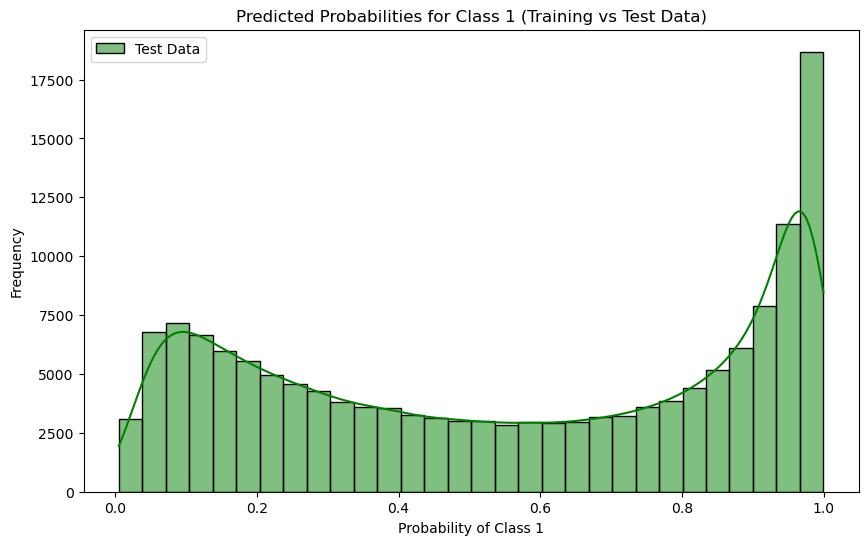

In [21]:
# Plot histograms
plt.figure(figsize=(10, 6))
#sns.histplot(train_prob, kde=True, color='blue', label='Training Data', bins=30)
sns.histplot(test_prob, kde=True, color='green', label='Test Data', bins=30)
plt.title('Predicted Probabilities for Class 1 (Training vs Test Data)')
plt.xlabel('Probability of Class 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
# Inspect the coefficients
coeffs = logres_model.coef_[0]
feature_names = X_test.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


             Feature  Coefficient
4      support_calls     0.417965
5      payment_delay     0.085766
9   last_interaction     0.033589
0                age     0.024331
2             tenure    -0.001238
8        total_spend    -0.003268
3    usage_frequency    -0.013026
6  subscription_type    -0.037278
7    contract_length    -0.077643
1             gender    -0.758518


## pipeline for params

In [23]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
pipe = Pipeline([
    ('scaler',  StandardScaler()),
    ('poly_feat', PolynomialFeatures(degree=2)),
    ('log_reg',  LogisticRegression(max_iter=10000))
])

params = {
    'poly_feat__degree' : [1, 2],
    'log_reg__C' : np.logspace(-2, 0, num=3),
    'log_reg__solver' : ['liblinear']
}

random_search = RandomizedSearchCV(
    pipe, param_distributions=params, cv=4, n_iter=4, scoring='roc_auc', random_state=42, verbose=2
)

random_search.fit(X_train, y_train)

print('Best Params: \n', random_search.best_params_)
print('Best Score (roc_auc): \n', random_search.best_score_)
print('Best Estimator: \n ', random_search.best_estimator_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   1.9s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   1.8s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   1.9s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   1.8s
[CV] END log_reg__C=1.0, log_reg__solver=liblinear, poly_feat__degree=2; total time=   1.8s
[CV] END log_reg__C=1.0, log_reg__solver=liblinear, poly_feat__degree=2; total time=   2.1s
[CV] END log

In [25]:
best_log_reg = random_search.best_estimator_
hyper_param_test_pred = best_log_reg.predict(X_test)

In [26]:
hyper_param_test_accuracy = accuracy_score(y_test, hyper_param_test_pred)

hyper_param_test_accuracy_report = classification_report(y_test, hyper_param_test_pred)

hyper_param_test_accuracy_roc_auc = roc_auc_score(y_test, hyper_param_test_pred)

hyper_param_test_confusion_matrix = confusion_matrix(y_test, hyper_param_test_pred)

In [27]:
print('--------hyper_param_accuracy---------')
print(f'1. HyperParam Testing Accuracy Score: \n  {hyper_param_test_accuracy:.2f}')
print('--------hyper_paramclassification_report---------')
print(f'2. HyperParam Testing Classification Report :\n {hyper_param_test_accuracy_report}')
print('--------hyper_param_roc_auc---------')
print(f'3. HyperParam Testing roc_auc score :\n {hyper_param_test_accuracy_roc_auc}')
print('--------confusion_matrix---------')
print(f'3. HyperParam Testing Confusion Matrix :\n {hyper_param_test_confusion_matrix}')

--------hyper_param_accuracy---------
1. HyperParam Testing Accuracy Score: 
  0.89
--------hyper_paramclassification_report---------
2. HyperParam Testing Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     67414
           1       0.90      0.90      0.90     84148

    accuracy                           0.89    151562
   macro avg       0.88      0.88      0.88    151562
weighted avg       0.89      0.89      0.89    151562

--------hyper_param_roc_auc---------
3. HyperParam Testing roc_auc score :
 0.8839082529376752
--------confusion_matrix---------
3. HyperParam Testing Confusion Matrix :
 [[58826  8588]
 [ 8818 75330]]


In [28]:
import pickle

# Save the best model
# Save the best model
with open('../../models/trained_model_01_logreg.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

# Load the saved model
#with open('trained_model_01_LogReg.pkl', 'rb') as f:
#    best_log_reg_loaded = pickle.load(f)
